# Bland 2020 MOT-EEG Data Exploration

In [1]:
import numpy as np
import glob
import pickle
import collections

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_bdf, read_raw_brainvision
from mne.time_frequency import tfr_morlet

import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt

# All Subjects Quick Expl.

In [2]:
freqs = np.arange(1, 40, 1)
n_cycles = freqs / 2.  # different number of cycle per frequency
    
folderpath = '/Volumes/Nick - Data/CDA Datasets/Bland 2020/EEG Data - Raw/'
#filepath = '/Volumes/Nick - Data/CDA Datasets/Bland2020 EEG-MOT-Data/1011/1011.vhdr'

power2D_all = dict()

for filepath in glob.iglob(folderpath + '*.vhdr'):
    filename = filepath[filepath.rfind('/')+1:]
    print('Processing: ' + filename + '...')

    # 1. -- Load File --
    raw = read_raw_brainvision(filepath, preload=True)

    sfreq = 1000
    raw = raw.resample(sfreq)
    
    events = mne.events_from_annotations(raw)
    
    # ---------- Debug Logs ----------
    frequency = collections.Counter(events[0][:,2])
    events_frequency = dict(frequency)

    print('Max Events in File...')
    print("---------------------------")
    for e in [10,11,20,21]: #set(events[0][:,2]):
        print("{}: \t\t{}".format(e, frequency[e]))
    print("---------------------------")
    # ---------- Debug Logs ----------
    
    epochs = Epochs(raw, events[0], event_id=[11], tmin=-3, tmax=15, baseline=(None, None), preload=True, event_repeated='merge', on_missing='warn')
    
    #for ch in ['Fpz', 'Cz', 'Oz', 'PO8']:
    #    power = tfr_morlet(epochs.copy().pick_channels([ch]), freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, average=False, decim=10, n_jobs=8, verbose=False)
    power = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, average=False, decim=5, n_jobs=8, verbose=False)
    power = power.apply_baseline((-1,0), mode='logratio', verbose=False)        

    power2D = power.data.mean(1).mean(0)
    power2D_all[filename] = power2D
    
    times = power.times
    
    #power.crop(tmin=-0.5, tmax=14).pick_channels(['Fpz', 'AFz', 'Cz', 'C6', 'Oz']).average().plot()
    
    del raw
    del epochs
    del power

Processing: 1361.vhdr...
Extracting parameters from /Volumes/Nick - Data/CDA Datasets/Bland 2020/EEG Data - Raw/1361.vhdr...
Setting channel info structure...
Reading 0 ... 2959239  =      0.000 ...  2959.239 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 15.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 192 events and 18001 original time points ...
0 bad epochs dropped
Processing: 1371.vhdr...
Extracting parameters from /Volumes/Nick - Data/CDA Datasets/Bland 2020/EEG Data - Ra

Setting channel info structure...
Reading 0 ... 3076419  =      0.000 ...  3076.419 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 15.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 192 events and 18001 original time points ...
0 bad epochs dropped
Processing: 1151.vhdr...
Extracting parameters from /Volumes/Nick - Data/CDA Datasets/Bland 2020/EEG Data - Raw/1151.vhdr...
Setting channel info structure...
Reading 0 ... 3284439  =      0.000 ...  3284.439 secs...
U

Max Events in File...
---------------------------
10: 		191
11: 		191
20: 		192
21: 		191
---------------------------
Not setting metadata
Not setting metadata
191 matching events found
Setting baseline interval to [-3.0, 15.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 191 events and 18001 original time points ...
0 bad epochs dropped
Processing: 1031.vhdr...
Extracting parameters from /Volumes/Nick - Data/CDA Datasets/Bland 2020/EEG Data - Raw/1031.vhdr...
Setting channel info structure...
Reading 0 ... 14365999  =      0.000 ...  2873.200 secs...
Used Annotations descriptions: ['Comment/Buffer Overflow', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		157
11: 		158
20: 		158
21

Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 15.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 192 events and 18001 original time points ...
0 bad epochs dropped
Processing: 1241.vhdr...
Extracting parameters from /Volumes/Nick - Data/CDA Datasets/Bland 2020/EEG Data - Raw/1241.vhdr...
Setting channel info structure...
Reading 0 ... 3153119  =      0.000 ...  3153.119 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setti

Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 15.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 192 events and 18001 original time points ...
0 bad epochs dropped
Processing: 1321.vhdr...
Extracting parameters from /Volumes/Nick - Data/CDA Datasets/Bland 2020/EEG Data - Raw/1321.vhdr...
Setting channel info structure...
Reading 0 ... 3365879  =      0.000 ...  3365.879 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 15.0] sec
Applying baseline

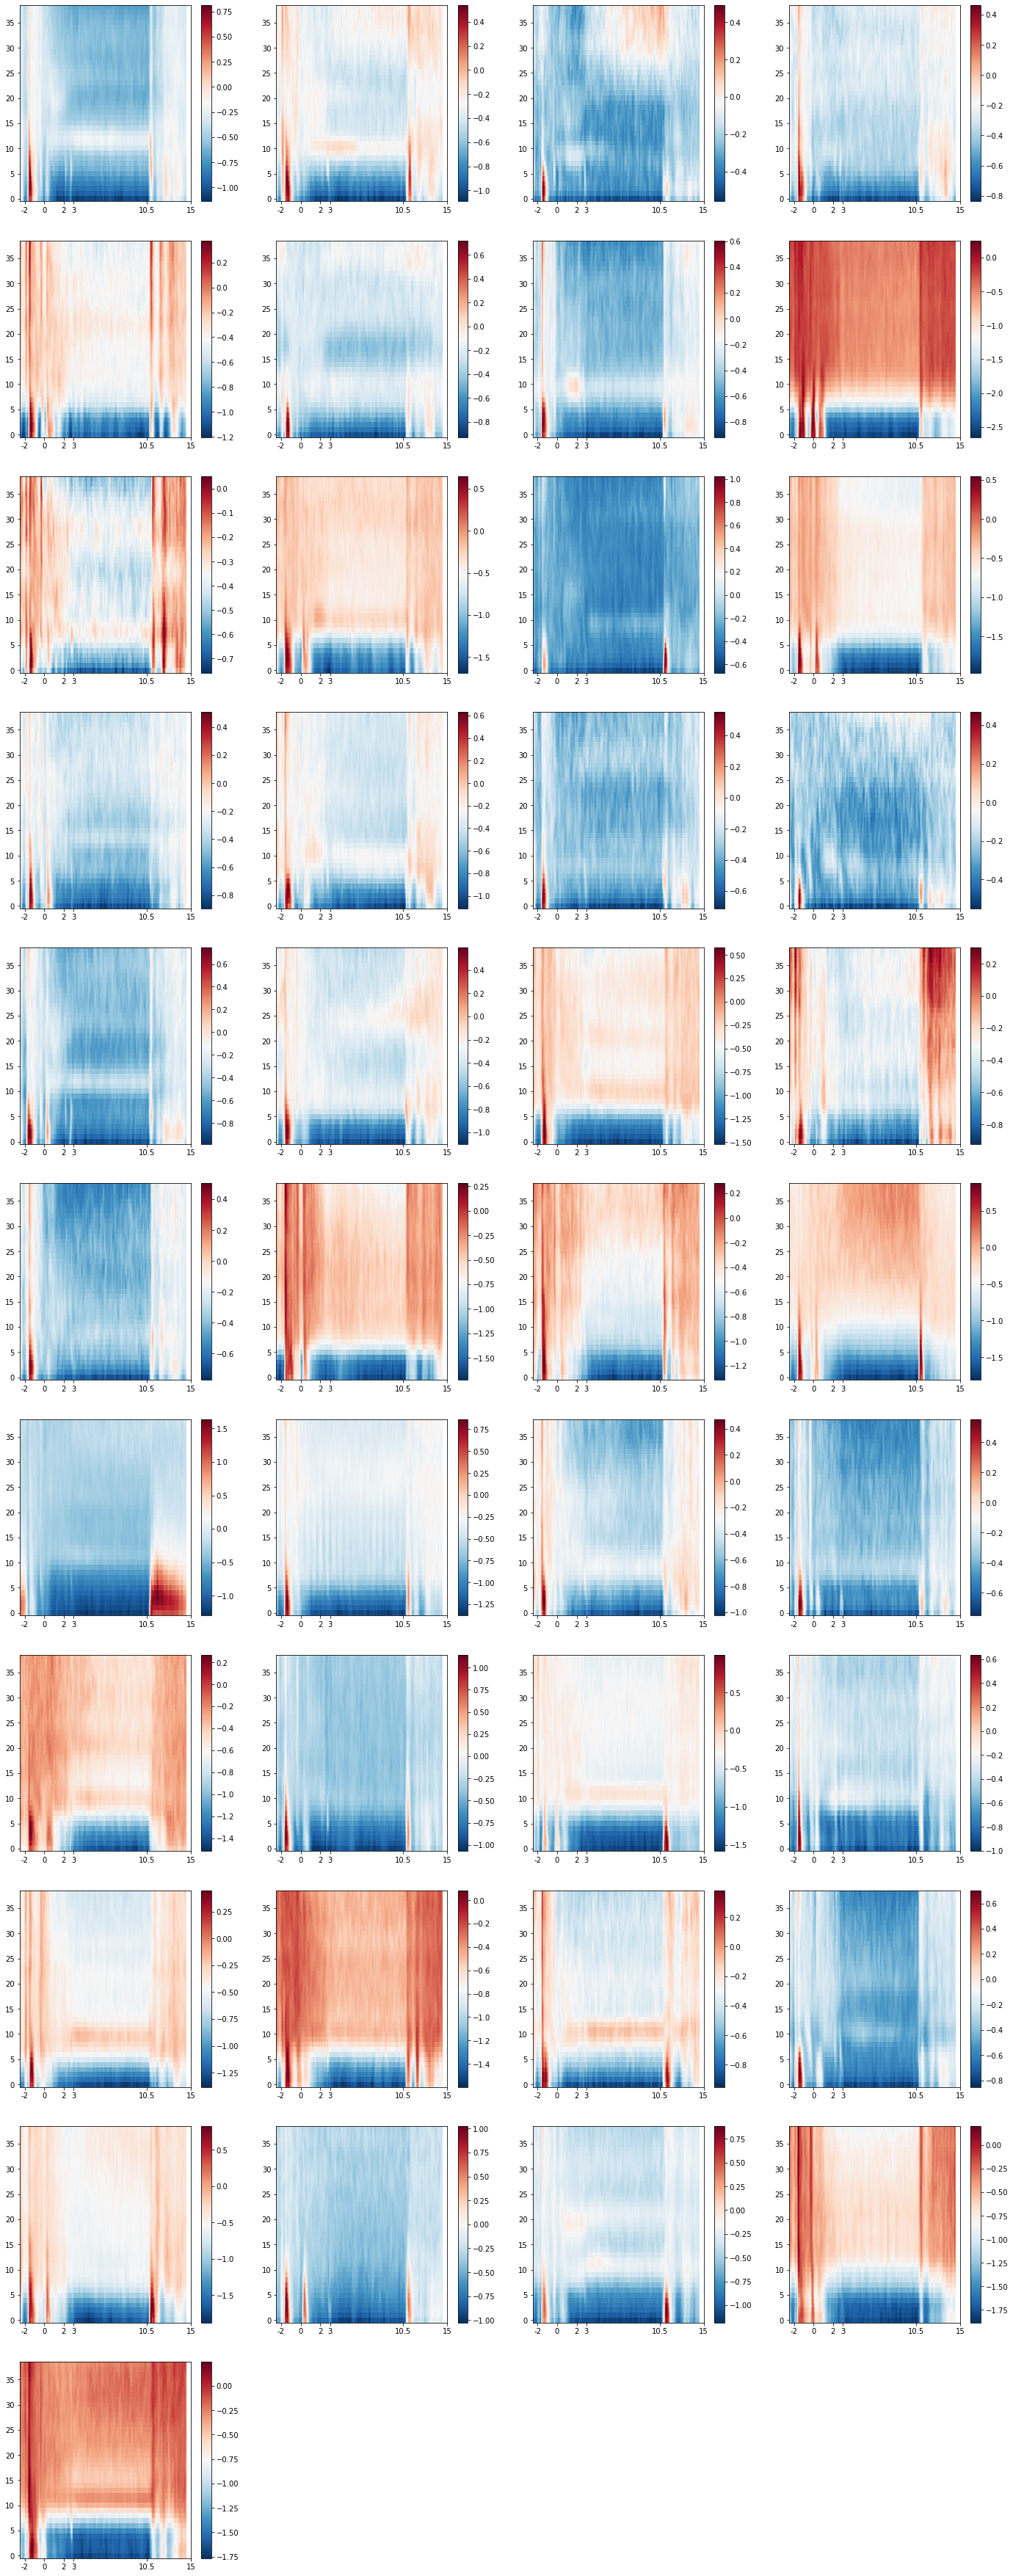

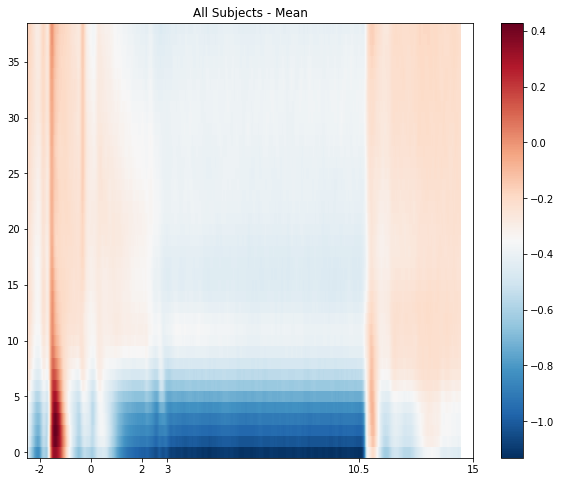

In [11]:
power2D_mean = np.array([])
power2D_stacked = []
for participant in power2D_all.keys():
    power2D_stacked.append(power2D_all[participant])

power2D_stacked = np.stack(power2D_stacked)
power2D_mean = np.mean(power2D_stacked, 0)

ticks_offset = 100 #np.where(power.times > -1)[0][0]
times_of_interest = [-2, 0, 2, 3, 10.5, 15]
ticks_of_interest = [(np.where(times >= t)[0][0] - ticks_offset) for t in times_of_interest]
        
# Show Subject by Subject.
plt.figure(figsize=(24, 64))
for i in range(power2D_stacked.shape[0]):
    ax = plt.subplot(11, 4, i+1)
    z = ax.imshow(power2D_stacked[i, :,100:-100], cmap='RdBu_r', interpolation='nearest', aspect='auto')#, vmin=-0.75, vmax=0.75)
    ax.set_xticks(ticks_of_interest)
    ax.set_xticklabels(times_of_interest)
    ax.invert_yaxis()
    #ax.set_title('Subject')
    plt.colorbar(z, ax=ax)
plt.show()
fig.savefig('Bland2020-RoughFrequencyAnalysis-AllSubjects.png', dpi=300, format='png')

# Show Group Average
fig, ax = plt.subplots(figsize=(10,8))
z = ax.imshow(power2D_mean[:,100:-100], cmap='RdBu_r', interpolation='nearest', aspect='auto')#, vmin=-0.75, vmax=0.75)
ax.set_xticks(ticks_of_interest)
ax.set_xticklabels(times_of_interest)
ax.invert_yaxis()
ax.set_title('All Subjects - Mean')
plt.colorbar(z, ax=ax)
plt.show()

# Tools for Quick Tests

In [8]:
filepath = '/Volumes/Nick - Data/CDA Datasets/Bland 2020/EEG Data - Raw/1011.vhdr'

#for filepath in glob.iglob(directory_path + '*.bdf'):
file_name = filepath[filepath.rfind('/')+1:]
print('Processing: ' + file_name + '...')

# 1. -- Load File --
raw = read_raw_brainvision(filepath, preload=True)
events = mne.events_from_annotations(raw)

Processing: 1011.vhdr...
Extracting parameters from /Volumes/Nick - Data/CDA Datasets/Bland 2020/EEG Data - Raw/1011.vhdr...
Setting channel info structure...
Reading 0 ... 16198499  =      0.000 ...  3239.700 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']


In [3]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: AF3, AF4, AF7, AF8, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 63 items (63 EEG)
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2016-01-14 10:48:04 UTC
 nchan: 63
 projs: []
 sfreq: 5000.0 Hz
>

Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB

Using matplotlib as 2D backend.


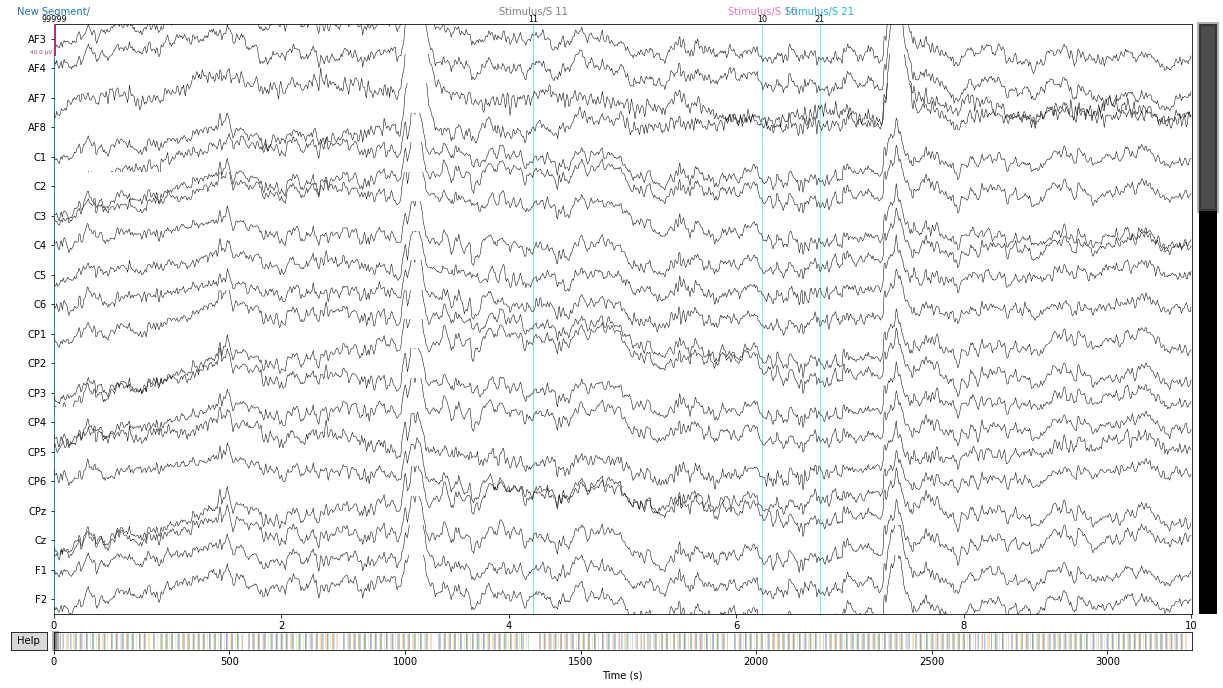

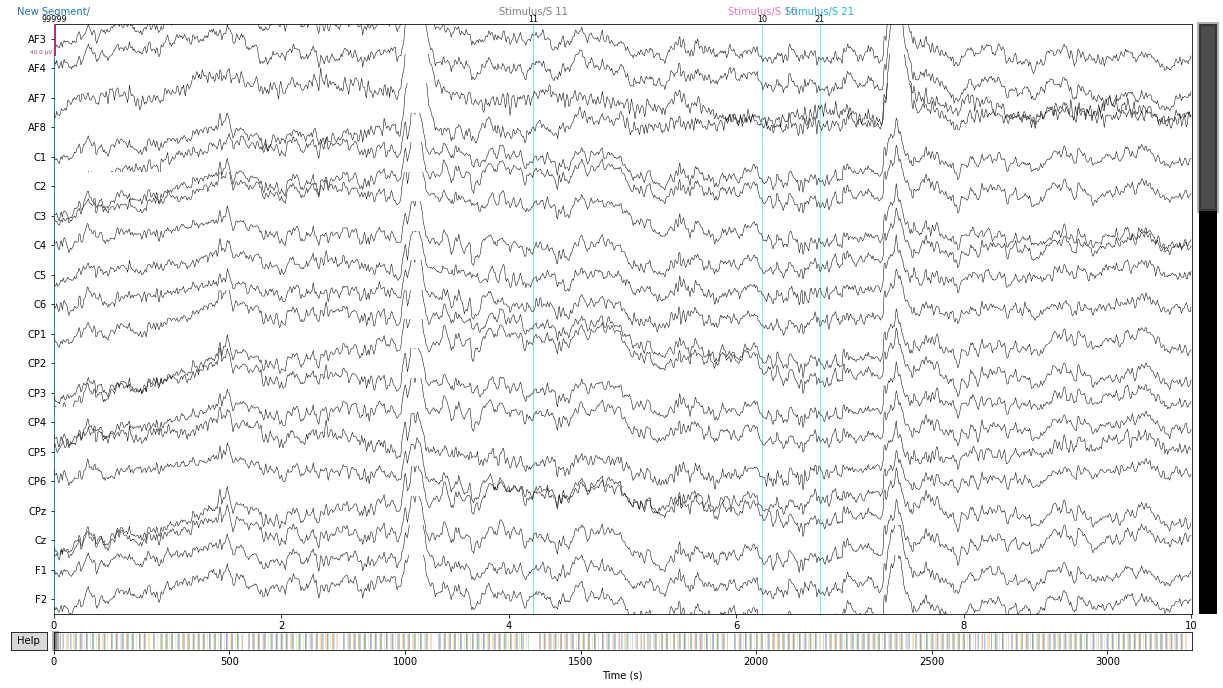

In [9]:
raw.plot(events=events[0], block=True, lowpass=40)

In [11]:
# ---------- Debug Logs ----------
frequency = collections.Counter(events[0][:,2])
events_frequency = dict(frequency)

print('Max Events in File...')
print("---------------------------")
for e in set(events[0][:,2]):
    print("{}: \t\t{}".format(e, frequency[e]))
print("---------------------------")
# ---------- Debug Logs ----------

Max Events in File...
---------------------------
64: 		45
1: 		48
2: 		48
3: 		47
4: 		48
10: 		192
11: 		192
51: 		5
20: 		192
21: 		192
52: 		91
63: 		40
62: 		11
99999: 		3
---------------------------


In [10]:
epochs = Epochs(raw, events[0], event_id=[11], tmin=-1, tmax=15, baseline=(None, None), preload=True, event_repeated='merge', on_missing='warn')


Not setting metadata
Not setting metadata
192 matching events found
Setting baseline interval to [-1.0, 15.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 192 events and 80001 original time points ...
0 bad epochs dropped


In [16]:
epochs

Number of events,192
Events,11: 192
Time range,-1.000 – 15.000 sec
Baseline,-1.000 – 15.000 sec


In [27]:
print(epochs)

<Epochs |  192 events (all good), -1 - 15 sec, baseline -1 – 15 sec, ~7.21 GB, data loaded,
 '11': 192>


In [20]:
print(epochs.info.ch_names)

['AF3', 'AF4', 'AF7', 'AF8', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'Fp1', 'Fp2', 'Fpz', 'FT7', 'FT8', 'Fz', 'O1', 'O2', 'Oz', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP10', 'TP7', 'TP8', 'TP9', 'Iz', 'FCz']


In [17]:
freqs = np.arange(1, 45, 1)
n_cycles = freqs / 2.  # different number of cycle per frequency

power = tfr_morlet(epochs.copy().pick_channels(['Fpz']), freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, average=False, decim=10, n_jobs=8, verbose=False)
power = power.apply_baseline((-1,0), mode='logratio', verbose=False)   

No baseline correction applied


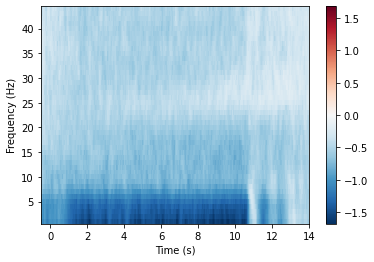

[<Figure size 432x288 with 2 Axes>]

In [19]:
power.crop(tmin=-0.5, tmax=14).average().plot()

In [26]:
power2D = power.data.mean(1)

times = power.times
ticks_offset = 100 #np.where(power.times > -1)[0][0]
times_of_interest = [0, 2, 10.5]
ticks_of_interest = [(np.where(times >= t)[0][0] + ticks_offset) for t in times_of_interest]
    
fig, ax = plt.subplots(figsize=(10,8))
z = ax.imshow(power2D.mean(0), cmap='RdBu_r', interpolation='nearest', aspect='auto')#, vmin=-0.75, vmax=0.75)
ax.invert_yaxis()
ax.set_xticks(ticks_of_interest)
ax.set_xticklabels(times_of_interest)
plt.colorbar(z, ax=ax)
plt.show()